# Final Project

## Introduction
 In the state of New York, New York City which comprises five boroughs such as Manhattan, Queens, Brooklyn, Bronx and Staten Island, is the largest city in the United States. The estimated population for New York City is 8.6 million in 2017, and it is expected to reach 9 million by 2040. In order to serve this huge population, the number of open restaurants in New York City should be high enough, as we can easily imagine. As of December 31 of 2017, there are 26.7K open restaurants in New York City. This plethora of eateries offered in New York City can overwhelm New Yorkers when they need to decide where to go and what to eat. In addition, the average American eats about 4.2 commercially prepared meals per week as of 2017, in other words, as a nation, Americans eat out between four and five times a week on average which is equivalent to 18.2 meals in a month. 

 Considering all of these, I was motivated to analyze the open restaurants in New York City, to provide New Yorkers with valuable insights regarding where to eat based on sound grounding. Despite the fact that there are a lot of reviews of restaurants available at our finger tip, it is hard to know if the restaurants of interest comply with the City and State food safety regulations through most of those reviews by customers that many people rely on when they eat outside the home. Hence, I expect my research questions in this project to help New Yorkers and visitors make better decisions when they consider eating out in New York City.

## Research Questions

I want to divide my research questions by two different perspectives for better clarity.
One is for recommended restaurants, and another is for restaurants to avoid.

For recommended restaurants,
<br>
1) What are the restaurants that are compliant with the City and State food safety regulations in NYC?
<br>
2) Are those restaurants getting better over time and/or keep hygiene constantly?
<br>
3) What does Yelp say about the best restaurant in terms of star rating and reviews?

For restaurants to avoid,
<br>
1) What are the restaurants that are not compliant with the City and State food safety regulations in NYC?
<br>
2) Are those restaurants getting any better over time?
<br>
3) What does Yelp say about the worst restaurant in terms of star rating and reviews?

Additional question by using the best restaurants recommended by Yelp,
<br>Are the top 10 best restaurants recommended by Yelp compliant with the food safety regulation?  

By answering above research questions, I can find insights on which restaurants in New York City are complying with the food safety regulations and also which restaurants are favored by the customers. This insigt will be a sound grounding for me to recommend these restaurants to those who struggle with deciding where to eat outside the home. Additionally, I will be able to find out if those recommended restaurants keep their hygiene over the years constantly. On the other hand, the restaurants to avoid will be analyzed as well in the same way that I will perform for the recommended restaurants with opposite values for each parameter to consider. The answers to the research questions will be a great help for those who seek reasonable foundations to rely on when they eat out, instead of solely depending on lay opinions or reviews.

## Data to be Used

The first dataset containing the Department of Health and Mental Hygiene New York City Restaurant Inspection Results will be downloaded from NYC OpenData website in CSV format, and I will load this dataset into Jupyter notebook for analysis.
Because of the limitations of Github repository(100MB), I truncated the dataset to contain the records from May 2017, and also deleted rows that contain missing values.
<br>
The second dataset containing the reviews of restaurants from Yelp.com will be read as JSON format accessible via the web API.

#### Attribute information

1. CAMIS: Unique identifier for the establishment (restaurant)
2. DBA: Establishment (restaurant) name
3. BORO: Borough of establishment (restaurant) location
4. BUILDING: Building number for establishment (restaurant) location
5. STREET: Street name for establishment (restaurant) location
6. ZIPCODE: Zip code of establishment (restaurant) location
7. PHONE: Phone number
8. CUISINE DESCRIPTION: Establishment (restaurant) cuisine
9. INSPECTION DATE	　
10. ACTION: Action associated with each establishment (restaurant) inspection
11. VIOLATION CODE: Violation code associated with an establishment (restaurant) inspection
12. VIOLATION DESCRIPTION: Violation description associated with an establishment  (restaurant) inspection
13. CRITICAL FLAG: Indicator of critical violation
14. SCORE: Total score for a particular inspection
<br>  Restaurants with a score between 0 and 13 points earn an A, those with 14 to 27 points receive a B and those with 28
or more a C.
15. GRADE: Grade associated with the inspection<br>
• N= Not Yet Graded<br>
• A = Grade A<br>
• B = Grade B<br>
• C = Grade C<br>
• Z = Grade Pending<br>
• P=Grade Pending issued on re-opening following an initial inspection that resulted in a closure

16. GRADE DATE: Date when grade was issued to the establishment (restaurant)
17. RECORD DATE: Date record was added to dataset
18. INSPECTION TYPE: A combination of the inspection program and the type of inspection performed

## References

1) DOHMH New York City Restaurant Inspection Results
<br>
https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j

2) Get started with the Yelp Fusion API
<br>
https://www.yelp.com/developers/documentation/v3/get_started

3) World Popultion Review
<br>
http://worldpopulationreview.com/us-cities/new-york-city-population/

4) Burdens abound, but NYC restaurants' numbers are growing
<br>
https://www.crainsnewyork.com/article/20180412/BLOGS01/180419940/burdens-abound-but-nyc-restaurants-numbers-are-growing

5) Don’t Eat Out as Often (188/365)
<br>
https://www.thesimpledollar.com/dont-eat-out-as-often-188365/

6) How we score and grade
<br>
https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf

## Approach

First of all, I will conduct EDA(exploratory data analysis) to describe and/or validate my dataset. After that, I will transform my datasets into appropriate format for analysis(Data Wrangling).
<br>
For recommended restaurants,
<br>
1) What are the best restaurants that are compliant with the City and State food safety regulations?
- I will extract the most recent inspection date, and then find the restaurants who received the lowest "Score" for the inspections. I will choose the top 5 restaurants.

<br>
2) Are those restaurants getting better over time and/or keep hygiene constantly?

- I will create the line plot by using the "Score"(dependent variable) and "Inspection Date"(independent variable) columns as respective variables to see the trends over time.

<br>
3) What does Yelp say about the best restaurant in terms of star rating and review?

- I will request data using Yelp API, which contains the star ratings and reveiws of the restaurant, by using the phone number and buisiness ID, respectively.

- I will assess the star ratings and reviews and draw conclusions.

For restaurants to avoid, I will conduct the same procedures as described above, using appropriate values for each parameter to consider. For example, I will use the highest "SCORE" to select the worst 5 restaurants in NYC.  

In addition, the dataset from Yelp with respective "best" and "worst" restaurants described above will include the latitude and longitude in one of the columns, "coordinates". By using the latitude and longitude, I will generate the map(geoplots) to locate the best and worst restaurants in New York City.
<br>
Finally, I will assess if the best restaurants recommended by Yelp are compliant with the food safety regulations.

### Phase 1: Loading the data and Data wrangling

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the data
df = pd.read_csv('https://raw.githubusercontent.com/mhan1/analytical-programming/master/NYC_RESTAURANTS.csv')

In [3]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40366132,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,10302.0,7184429401,Pizza/Italian,5/1/2017,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,10.0,A,5/1/2017,5/4/2019,Cycle Inspection / Re-inspection
1,40366132,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,10302.0,7184429401,Pizza/Italian,5/1/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,10.0,A,5/1/2017,5/4/2019,Cycle Inspection / Re-inspection
2,40367442,BUDDY'S WONDER BAR,STATEN ISLAND,17,HARRISON AVENUE,10302.0,7184429768,American,5/1/2017,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Critical,27.0,NaN,NaN,5/4/2019,Cycle Inspection / Initial Inspection
3,40367442,BUDDY'S WONDER BAR,STATEN ISLAND,17,HARRISON AVENUE,10302.0,7184429768,American,5/1/2017,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,27.0,NaN,NaN,5/4/2019,Cycle Inspection / Initial Inspection
4,40367442,BUDDY'S WONDER BAR,STATEN ISLAND,17,HARRISON AVENUE,10302.0,7184429768,American,5/1/2017,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,27.0,NaN,NaN,5/4/2019,Cycle Inspection / Initial Inspection


In [4]:
df.shape

(263755, 18)

In [5]:
df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [6]:
#creating a pandas DataFrame with a subset of the columns in the dataset.
df1 = df[['DBA','BORO','BUILDING', 'STREET', 'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 
          'ACTION', 'VIOLATION DESCRIPTION', 'SCORE', 'GRADE']]
df1.head(3)

,DBA,BORO,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,SCORE,GRADE
0,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,7184429401,Pizza/Italian,5/1/2017,Violations were cited in the following area(s).,Hot food item not held at or above 140Âº F.,10.0,A
1,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,7184429401,Pizza/Italian,5/1/2017,Violations were cited in the following area(s).,Non-food contact surface improperly constructe...,10.0,A
2,BUDDY'S WONDER BAR,STATEN ISLAND,17,HARRISON AVENUE,7184429768,American,5/1/2017,Violations were cited in the following area(s).,Food Protection Certificate not held by superv...,27.0,NaN


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263755 entries, 0 to 263754
Data columns (total 11 columns):
DBA                      263751 non-null object
BORO                     263755 non-null object
BUILDING                 263596 non-null object
STREET                   263755 non-null object
PHONE                    263742 non-null object
CUISINE DESCRIPTION      263755 non-null object
INSPECTION DATE          263755 non-null object
ACTION                   263755 non-null object
VIOLATION DESCRIPTION    258164 non-null object
SCORE                    252774 non-null float64
GRADE                    132573 non-null object
dtypes: float64(1), object(10)
memory usage: 22.1+ MB


In [8]:
#checking the first value of INSPECTION DATE column
df1['INSPECTION DATE'][0]

'5/1/2017'

In [9]:
#checking the data type of INSEPCTION DATE column first value
type(df1['INSPECTION DATE'][0])

str

In [10]:
#transforming the data type of INSPECTION DATE column into datetime
df1['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])

C:\Users\Minyeong\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
#sanity check for the first value of INSPECTION DATE column
df1['INSPECTION DATE'][0]

Timestamp('2017-05-01 00:00:00')

In [12]:
#checking the data type after converting into datetime
type(df1['INSPECTION DATE'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
#checking the dataframe df1 summary
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263755 entries, 0 to 263754
Data columns (total 11 columns):
DBA                      263751 non-null object
BORO                     263755 non-null object
BUILDING                 263596 non-null object
STREET                   263755 non-null object
PHONE                    263742 non-null object
CUISINE DESCRIPTION      263755 non-null object
INSPECTION DATE          263755 non-null datetime64[ns]
ACTION                   263755 non-null object
VIOLATION DESCRIPTION    258164 non-null object
SCORE                    252774 non-null float64
GRADE                    132573 non-null object
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 22.1+ MB


In [14]:
#chekcing the description of df1 dataframe
df1.describe()

,SCORE
count,252774.000000
mean,20.724153
std,15.033151
min,-1.000000
25%,11.000000
50%,16.000000
75%,26.000000
max,166.000000


### Phase 2:Perform exploratory data analysis(EDA) - show the distribution of data for each of the columns you selected and include text describing your EDA findings.

In [15]:
#descriptive statistics for df1 dataframe
df1.describe()

,SCORE
count,252774.000000
mean,20.724153
std,15.033151
min,-1.000000
25%,11.000000
50%,16.000000
75%,26.000000
max,166.000000


In [16]:
#printing a concise summary of df1 dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263755 entries, 0 to 263754
Data columns (total 11 columns):
DBA                      263751 non-null object
BORO                     263755 non-null object
BUILDING                 263596 non-null object
STREET                   263755 non-null object
PHONE                    263742 non-null object
CUISINE DESCRIPTION      263755 non-null object
INSPECTION DATE          263755 non-null datetime64[ns]
ACTION                   263755 non-null object
VIOLATION DESCRIPTION    258164 non-null object
SCORE                    252774 non-null float64
GRADE                    132573 non-null object
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 22.1+ MB


In [17]:
#checking columns
df1.columns

Index(['DBA', 'BORO', 'BUILDING', 'STREET', 'PHONE', 'CUISINE DESCRIPTION',
       'INSPECTION DATE', 'ACTION', 'VIOLATION DESCRIPTION', 'SCORE', 'GRADE'],
      dtype='object')

In [18]:
#renaming the 'DBA' and 'BORO' columns.
df1.rename(columns={'DBA':'RESTAURANT', 'BORO':'BOROUGH'}, inplace = True)

C:\Users\Minyeong\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [19]:
df1.columns

Index(['RESTAURANT', 'BOROUGH', 'BUILDING', 'STREET', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION DESCRIPTION', 'SCORE', 'GRADE'],
      dtype='object')

In [20]:
#identifying missing values, displaying the columns that have null values
print(df1.isnull().any(axis=0))

RESTAURANT                True
BOROUGH                  False
BUILDING                  True
STREET                   False
PHONE                     True
CUISINE DESCRIPTION      False
INSPECTION DATE          False
ACTION                   False
VIOLATION DESCRIPTION     True
SCORE                     True
GRADE                     True
dtype: bool


Based on above, DBA, BUILDING, PHONE, VIOLATION DESCRIPTION, SCORE, AND GRADE columns have null values.
<br> According to "How we score and grade" by NYC Health department (https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf),
<br> A restaurant has two chances to earn an A in every inspection
cycle. If it doesn’t earn an A on the first inspection, it’s scored but
ungraded. An inspector goes back to the restaurant
unannounced, typically within a month, to inspect it again
and the re-inspection is graded. If the grade is a B or C, the
restaurant will receive a grade card and a grade pending card. It
can post either card until it has an opportunity to be heard at
the Office of Administrative Trials and Hearings Health
Tribunal.
<br>
Hence, the null values in GRADE columns can be either "scored but ungraded", or in the "pending" status. Either way, these restaurants did not receive A grade on the first inspection. Therefore, I decided to leave those "null" values in the GRADE column as these indicate those restaurants are not "A" grade restaurants, at least, yet.

In [21]:
#sanity check
df1.head(3)

,RESTAURANT,BOROUGH,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,SCORE,GRADE
0,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,7184429401,Pizza/Italian,2017-05-01,Violations were cited in the following area(s).,Hot food item not held at or above 140Âº F.,10.0,A
1,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,7184429401,Pizza/Italian,2017-05-01,Violations were cited in the following area(s).,Non-food contact surface improperly constructe...,10.0,A
2,BUDDY'S WONDER BAR,STATEN ISLAND,17,HARRISON AVENUE,7184429768,American,2017-05-01,Violations were cited in the following area(s).,Food Protection Certificate not held by superv...,27.0,NaN


### Distribution of 'BOROUGH'

In [22]:
#checking the BOROUGH column summary information
df1['BOROUGH'].describe()

count        263755
unique            5
top       MANHATTAN
freq         103723
Name: BOROUGH, dtype: object

In [23]:
#checking unique values in BOROUGH column
df1['BOROUGH'].unique()

array(['STATEN ISLAND', 'MANHATTAN', 'QUEENS', 'BROOKLYN', 'BRONX'],
      dtype=object)

In [24]:
#getting the value counts for the 'BOROUGH' variable, which is categorical data type.
df1['BOROUGH'].value_counts()

MANHATTAN        103723
BROOKLYN          66650
QUEENS            60859
BRONX             23289
STATEN ISLAND      9234
Name: BOROUGH, dtype: int64

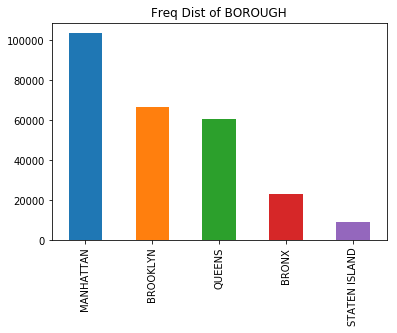

In [25]:
#creating a bar plot of the 'BOROUGH' variable's value counts
df1['BOROUGH'].value_counts().plot.bar(title = "Freq Dist of BOROUGH");

Based on above, there are 103723 of inspected restaurants' records in Manhattan, which is the largest counts, and there are 9234 of inspected restaurants' records in STATEN ISLAND which is the smallest counts in the dataset.

### Distribution of 'RESTAURANT'

In [26]:
#checking the RESTAURANT column summary information
df1['RESTAURANT'].describe()

count             263751
unique             20640
top       DUNKIN' DONUTS
freq                2438
Name: RESTAURANT, dtype: object

In [27]:
#checking unique values in RESTAURANT column
df1['RESTAURANT'].unique()

array(["DENINO'S PIZZERIA TAVERN", "BUDDY'S WONDER BAR",
       'ASTRO RESTAURANT', ..., 'HALO BISTRO CAFE', 'GRUIT',
       'WHISTLE & FIZZ'], dtype=object)

In [28]:
#getting the value counts for the 'RESTAURANT' variable, which is categorical data type.
df1['RESTAURANT'].value_counts()

DUNKIN' DONUTS                               2438
SUBWAY                                       2014
STARBUCKS                                    1420
MCDONALD'S                                   1271
KENNEDY FRIED CHICKEN                         904
CROWN FRIED CHICKEN                           732
DUNKIN' DONUTS, BASKIN ROBBINS                710
BURGER KING                                   653
DOMINO'S                                      630
GOLDEN KRUST CARIBBEAN BAKERY & GRILL         557
POPEYES LOUISIANA KITCHEN                     445
KFC                                           420
CHIPOTLE MEXICAN GRILL                        407
DUNKIN DONUTS                                 339
LE PAIN QUOTIDIEN                             310
CHECKERS                                      283
VIVI BUBBLE TEA                               259
WENDY'S                                       252
PARIS BAGUETTE                                246
PRET A MANGER                                 238


Since there are total 20640 unique restaurants in the dataset as shown above, I will not plot the bar chart to show the distribution. Dunkin' donuts are the most frequent restaurant in the dataset, followed by Subway, Starbucks, and Mcdonald's.

### Distribution of SCORE

In [29]:
#checking the SCORE column summary information
df1['SCORE'].describe()

count    252774.000000
mean         20.724153
std          15.033151
min          -1.000000
25%          11.000000
50%          16.000000
75%          26.000000
max         166.000000
Name: SCORE, dtype: float64

In [30]:
df1['SCORE'].unique()

array([ 10.,  27.,  13.,   4.,   7.,   9.,   3.,  nan,  12.,  11.,   6.,
        43.,   2.,  18.,  22.,  14.,  19.,  23.,   5.,  15.,  16.,  37.,
        28.,  25.,   8.,  17.,  42.,  32.,  20.,  33.,  79.,  36.,   0.,
        39.,  26.,  34.,  24.,  30.,  21.,  44.,  62.,  29.,  31.,  35.,
        40.,  66.,  41., 109.,  47.,  68.,  45.,  38.,  48.,  65.,  46.,
        57.,  63.,  64.,  56.,  50.,  53.,  49.,  69.,  76.,  55., 117.,
        72.,  73.,  70.,  -1.,  51.,  61.,  52.,  59.,  85.,  58.,  78.,
        71.,  82.,  77.,  74.,  87.,  60.,  67.,  83.,  84.,  54.,  89.,
        90.,  75., 151.,  91., 110.,  81., 120.,  92.,  86., 103.,  94.,
        99., 135., 137.,  80., 115., 111., 124., 114., 116.,  88., 122.,
       101.,  96., 104.,  93., 155., 140.,  98., 141., 112., 119., 132.,
       106.,  97., 105., 102., 152., 100.,  95., 107., 129., 136., 131.,
       108., 166.])

In [31]:
#checking the null values
df1['SCORE'].isnull().any(axis=0)

True

In [32]:
#converting the null values into 0
df1["SCORE"].fillna("0", inplace = True) 

C:\Users\Minyeong\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [33]:
df1.head(2)

,RESTAURANT,BOROUGH,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,SCORE,GRADE
0,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,7184429401,Pizza/Italian,2017-05-01,Violations were cited in the following area(s).,Hot food item not held at or above 140Âº F.,10,A
1,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,7184429401,Pizza/Italian,2017-05-01,Violations were cited in the following area(s).,Non-food contact surface improperly constructe...,10,A


In [34]:
#converting SCORE column data type into integer.
df1.SCORE = df1.SCORE.astype(int)

C:\Users\Minyeong\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


C:\Users\Minyeong\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of SCORE')

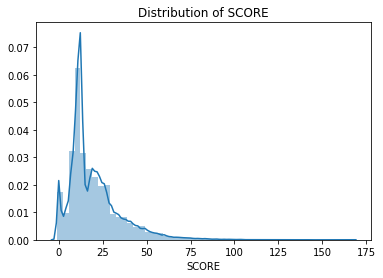

In [35]:
#histogram of 'SCORE' variable which is numeric data type.
sns.distplot(df1.SCORE)
plt.title('Distribution of SCORE')

Text(0.5, 1.0, 'Boxplot of SCORE')

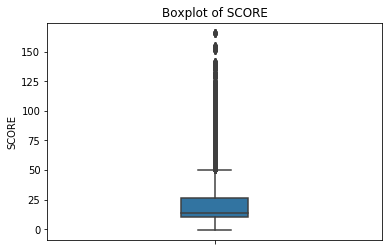

In [36]:
sns.boxplot(df1.SCORE, orient = 'v', width=0.2)
plt.title('Boxplot of SCORE')

In [37]:
#checking the SCORE column summary information
df1['SCORE'].describe()

count    263755.000000
mean         19.861337
std          15.288014
min          -1.000000
25%          10.000000
50%          14.000000
75%          26.000000
max         166.000000
Name: SCORE, dtype: float64

Based on above, SCORE variable is right-skewed as the mean value is larger than the median. The mean score is 19.86, which indicates GRADE B. 

### Distribution of GRADE

In [38]:
#checking the GRADE column summary information
df1['GRADE'].describe()

count     132573
unique         7
top            A
freq      102827
Name: GRADE, dtype: object

In [39]:
#checking unique values in GRADE column
df1['GRADE'].unique()

array(['A', nan, 'B', 'P', 'C', 'Z', 'Not Yet Graded', 'G'], dtype=object)

In [40]:
#getting the value counts for the 'GRADE' variable, which is categorical data type.
df1['GRADE'].value_counts()

A                 102827
B                  16420
C                   5973
Z                   3101
Not Yet Graded      2373
P                   1874
G                      5
Name: GRADE, dtype: int64

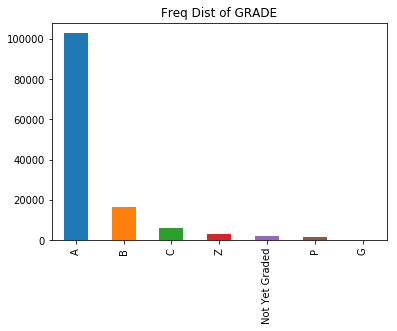

In [41]:
#creating a bar plot of the 'GRADE' variable's value counts
df1['GRADE'].value_counts().plot.bar(title = "Freq Dist of GRADE");

Based on above, 102827 of inspected restaurants received A grade, which is the most frequent grade, and there are some pending grades such as Z, P, G, and "Not Yet Graded". The details about how Health department score and grade was described above, and also it can be found in the link: https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf

### Phase 3: Find the restaurants that received the lowest SCORE and the best GRADE in NYC.

In [42]:
#sanity check
df1.head(2)

,RESTAURANT,BOROUGH,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,SCORE,GRADE
0,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,7184429401,Pizza/Italian,2017-05-01,Violations were cited in the following area(s).,Hot food item not held at or above 140Âº F.,10,A
1,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,7184429401,Pizza/Italian,2017-05-01,Violations were cited in the following area(s).,Non-food contact surface improperly constructe...,10,A


In [43]:
#checking the INSPECTIN DATE column
df1['INSPECTION DATE'].describe()

count                  263755
unique                    644
top       2019-03-28 00:00:00
freq                      996
first     2017-05-01 00:00:00
last      2019-05-02 00:00:00
Name: INSPECTION DATE, dtype: object

In [44]:
#finding the most recent inspection date
df1['INSPECTION DATE'].sort_values(ascending=False).head()

263754   2019-05-02
263420   2019-05-02
263407   2019-05-02
263408   2019-05-02
263409   2019-05-02
Name: INSPECTION DATE, dtype: datetime64[ns]

Based on above, 2019-05-02 is the most recent INSPECTION DATE in the dataset, so I will use this date to find the "best" restaurant based on the SCORE and GRADE in each borough.

In [45]:
#extracting the data which was inspected on 2019-05-02
df2 = pd.DataFrame(df1.loc[df1['INSPECTION DATE'] == '2019-05-02'])
df2.head(3)

,RESTAURANT,BOROUGH,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,SCORE,GRADE
263248,THE NEW AMITY RESTAURANT,MANHATTAN,1134,MADISON AVENUE,2128613255,American,2019-05-02,Violations were cited in the following area(s).,Hot food item not held at or above 140Âº F.,9,A
263249,THE NEW AMITY RESTAURANT,MANHATTAN,1134,MADISON AVENUE,2128613255,American,2019-05-02,Violations were cited in the following area(s).,Mechanical or natural ventilation system not p...,9,A
263250,WESTERN BAKERY,QUEENS,22813,MERRICK BOULEVARD,7185253201,Caribbean,2019-05-02,Violations were cited in the following area(s).,Food not cooled by an approved method whereby ...,9,A


In [46]:
#checking the number of rows and columns
df2.shape

(507, 11)

In [108]:
#grouping by 'BOROUGH' and 'RESTAURANT', and then calculating the mean of 'SCORE' column.
grouped_df2 = df2.groupby(['BOROUGH', 'RESTAURANT', 'GRADE'])['SCORE'].agg([('Average Score', 'mean')]).sort_values(by=['Average Score'], ascending=True)
grouped_df2.head(5)

,,,Average Score
BOROUGH,RESTAURANT,GRADE,
MANHATTAN,MILK BAR NOLITA,A,2
STATEN ISLAND,SUBWAY,A,2
BROOKLYN,CROWN FRIED CHICKEN,A,2
QUEENS,CAFE TO GO,A,2
MANHATTAN,NATHAN'S FAMOUS,A,2


Recommended restaurants: Based on above table, MILK BAR NOLITA, SUBWAY, CROWN FRIED CHICKEN, CAFE TO GO, NATHAN'S FAMOUS are the best 5 restaurants in terms of lowest SCORE as of 2019-05-02, which means they are compliant with the City and State food safety regulations.

### Phase 4: Find the restaurants that received the highest SCORE and the worst GRADE in NYC.

In [74]:
grouped_df2.tail(5)

,,,Average Score
BOROUGH,RESTAURANT,GRADE,
MANHATTAN,LUCKY,Z,39
BROOKLYN,TOBY'S ESTATE COFFEE BUSHWICK,Z,40
MANHATTAN,GOURMET PARK,Z,43
BROOKLYN,EMMY SQUARED,Z,51
QUEENS,SOUTHERN GIRLS SOUL FOOD,Not Yet Graded,119


Restaurants to avoid: Based on above table, SOUTHERN GIRLS SOUL FOOD  is the worst restaurant scoring 119 as of 2019-05-02, followed by EMMY SQUARED, GOURMET PARK, TOBY'S ESTATE COFFEE BUSHWICK, and LUCKY. They are definitely not compliant with the City and State food safety regulations, and we need to avoid these restaurants.

### Phase 5: Assess the best and the worst restaurants' compliance with the food safety regulations over time, respectively.

In [82]:
#replacing the charcter(') into (-) in RESTAURANT column
df1['RESTAURANT'] = df1['RESTAURANT'].str.replace("'", "-")

C:\Users\Minyeong\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [161]:
#extracting the data which contain the best restaurants
df2_best = df1[df1['RESTAURANT'].isin(['NATHAN-S FAMOUS', 'CAFE TO GO', 'CROWN FRIED CHICKEN', 'SUBWAY', 'MILK BAR NOLITA'])]
df2_best

,RESTAURANT,BOROUGH,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,SCORE,GRADE
435,SUBWAY,QUEENS,11814,JAMAICA AVENUE,7184874079,Sandwiches/Salads/Mixed Buffet,2017-05-02,Violations were cited in the following area(s).,Hot food item not held at or above 140Âº F.,17,NaN
436,SUBWAY,QUEENS,11814,JAMAICA AVENUE,7184874079,Sandwiches/Salads/Mixed Buffet,2017-05-02,Violations were cited in the following area(s).,Evidence of mice or live mice present in facil...,17,NaN
437,SUBWAY,QUEENS,11814,JAMAICA AVENUE,7184874079,Sandwiches/Salads/Mixed Buffet,2017-05-02,Violations were cited in the following area(s).,Facility not vermin proof. Harborage or condit...,17,NaN
561,SUBWAY,QUEENS,13240,METROPOLITAN AVE,7185269800,Sandwiches,2017-05-02,Violations were cited in the following area(s).,Evidence of mice or live mice present in facil...,9,NaN
562,SUBWAY,QUEENS,13240,METROPOLITAN AVE,7185269800,Sandwiches,2017-05-02,Violations were cited in the following area(s).,Facility not vermin proof. Harborage or condit...,9,NaN
756,SUBWAY,MANHATTAN,21,EAST 118 STREET,2122890142,Sandwiches,2017-05-03,Violations were cited in the following area(s).,"Food contact surface not properly washed, rins...",5,A
761,NATHAN-S FAMOUS,BROOKLYN,569,MYRTLE AVENUE,7187833744,Hotdogs,2017-05-03,Violations were cited in the following area(s).,"Food contact surface not properly washed, rins...",7,A
762,NATHAN-S FAMOUS,BROOKLYN,569,MYRTLE AVENUE,7187833744,Hotdogs,2017-05-03,Violations were cited in the following area(s).,Non-food contact surface improperly constructe...,7,A
896,CROWN FRIED CHICKEN,BROOKLYN,577,SUTTER AVE,3474058729,Chicken,2017-05-03,Violations were cited in the following area(s).,Evidence of rats or live rats present in facil...,21,NaN
897,CROWN FRIED CHICKEN,BROOKLYN,577,SUTTER AVE,3474058729,Chicken,2017-05-03,Violations were cited in the following area(s).,Evidence of mice or live mice present in facil...,21,NaN


In [113]:
#extracting the year from 'INSPECTINO DATE' column
df2_best['INSPECTION DATE'] = df2_best['INSPECTION DATE'].map(lambda x: x.year)

C:\Users\Minyeong\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


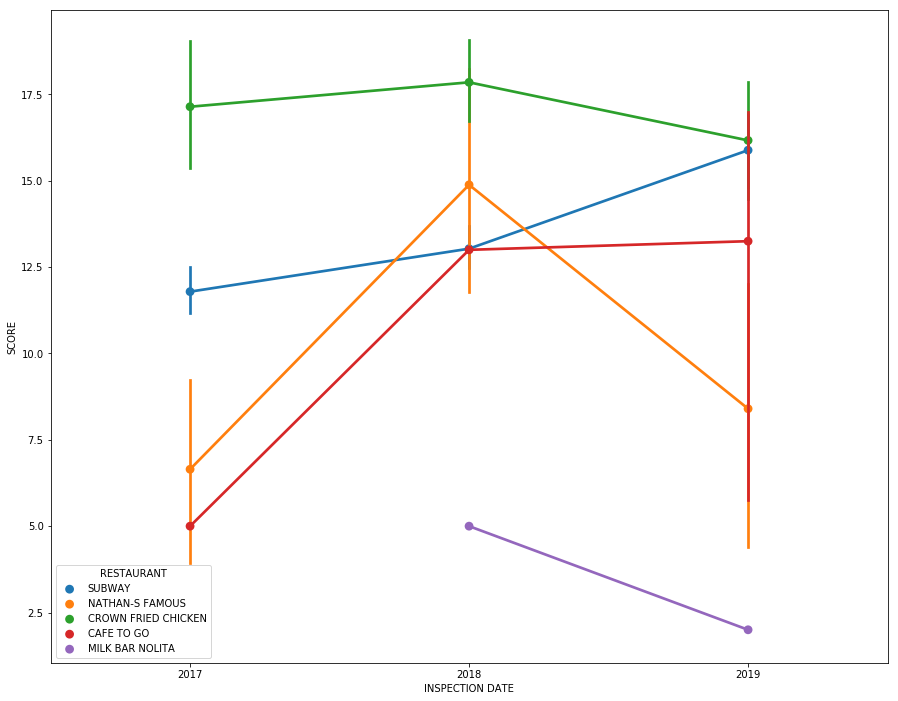

In [114]:
#creating a line chart to visualize the trend
plt.figure(figsize=(15,12))
sns.pointplot(x='INSPECTION DATE', y='SCORE', hue='RESTAURANT', data=df2_best);

Based on above line chart, MILK BAR NOLITA, NATHAN-S FAMOUS, CROWN FRIEND CHICKEN restaurants have improved their compliance with the City and State food safety regulations since 2018. SUBWAY and CAFE TO GO have not been improving their compliance with the food safety regulations since 2017, even though they received A grade in 2019.

In [146]:
#extracting the data which contain the worst restaurants
df2_worst = df1[df1['RESTAURANT'].isin(['LUCKY', 'TOBY-S ESTATE COFFEE BUSHWICK', 'GOURMET PARK', 
                                        'EMMY SQUARED', 'SOUTHERN GIRLS SOUL FOOD'])]
df2_worst

,RESTAURANT,BOROUGH,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,SCORE,GRADE
59331,EMMY SQUARED,BROOKLYN,364,GRAND ST,7183604535,Pizza,2017-12-09,Violations were cited in the following area(s).,Wiping cloths soiled or not stored in sanitizi...,7,A
59332,EMMY SQUARED,BROOKLYN,364,GRAND ST,7183604535,Pizza,2017-12-09,Violations were cited in the following area(s).,Canned food product observed dented and not se...,7,A
113195,SOUTHERN GIRLS SOUL FOOD,QUEENS,21828,MERRICK BLVD,7189490400,Soul Food,2018-05-01,Violations were cited in the following area(s).,Food Protection Certificate not held by superv...,58,NaN
113196,SOUTHERN GIRLS SOUL FOOD,QUEENS,21828,MERRICK BLVD,7189490400,Soul Food,2018-05-01,Violations were cited in the following area(s).,Evidence of mice or live mice present in facil...,58,NaN
113197,SOUTHERN GIRLS SOUL FOOD,QUEENS,21828,MERRICK BLVD,7189490400,Soul Food,2018-05-01,Violations were cited in the following area(s).,"No facilities available to wash, rinse and san...",58,NaN
113198,SOUTHERN GIRLS SOUL FOOD,QUEENS,21828,MERRICK BLVD,7189490400,Soul Food,2018-05-01,Violations were cited in the following area(s).,Food not protected from potential source of co...,58,NaN
113199,SOUTHERN GIRLS SOUL FOOD,QUEENS,21828,MERRICK BLVD,7189490400,Soul Food,2018-05-01,Violations were cited in the following area(s).,Facility not vermin proof. Harborage or condit...,58,NaN
113200,SOUTHERN GIRLS SOUL FOOD,QUEENS,21828,MERRICK BLVD,7189490400,Soul Food,2018-05-01,Violations were cited in the following area(s).,Pesticide use not in accordance with label or ...,58,NaN
113201,SOUTHERN GIRLS SOUL FOOD,QUEENS,21828,MERRICK BLVD,7189490400,Soul Food,2018-05-01,Violations were cited in the following area(s).,''''Wash hands sign not posted at hand wash f...,58,NaN
115991,SOUTHERN GIRLS SOUL FOOD,QUEENS,21828,MERRICK BLVD,7189490400,Soul Food,2018-05-08,Violations were cited in the following area(s).,Evidence of mice or live mice present in facil...,16,NaN


In [117]:
#extracting the year from 'INSPECTINO DATE' column
df2_worst['INSPECTION DATE'] = df2_worst['INSPECTION DATE'].map(lambda x: x.year)

C:\Users\Minyeong\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


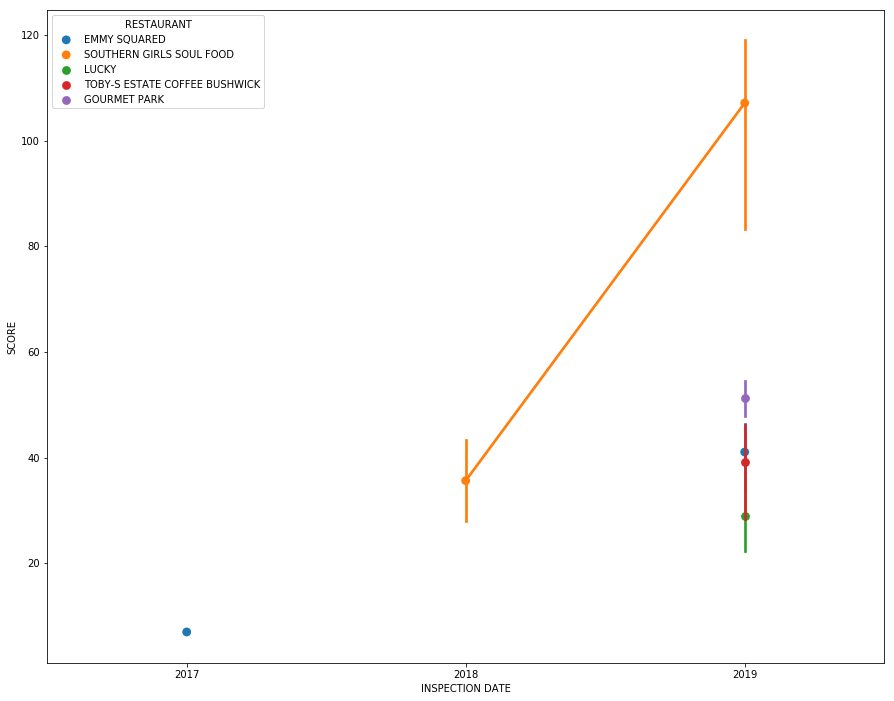

In [120]:
#creating a line chart to visualize the trend
plt.figure(figsize=(15,12))
sns.pointplot(x='INSPECTION DATE', y='SCORE', hue='RESTAURANT', data=df2_worst);

Based on above line chart, SOUTHEN GIRLS SOUL FOOD, EMMY SQUARED have been getting worse in terms of compliance with the food safety regulations over time, and the other three restaurants such as GOURMET PARK, TOBY-S ESTATE COFFEE BUSHWICK, LUCKY have not been inspected in 2017 and 2018, and their inspection results in 2019 indicated they were not compliant with the food safety regulations. We should not go to these "worst" restaurants for our own safety/health reasons.

### Phase 6: Assess the star ratings and  reviews from Yelp for the best and the worst restaurants, respectively.

### The best restaurant's ratings, review_counts, and coordinates

In [121]:
#importing necessary libraries
import requests
import json

In [155]:
#api-endpoint
api_key = '4ZV6k_jsCYOmslVsz-SDQgRCYsOngFjXx6vbdY-09nDR6UsSEDjVXu-wgDCJDnVSAVTjYBr1PZFsm00JOFfYRzaavn_ObxoflOlWJCO3SON5Z1q5lIgZXx_REEawXHYx'
headers = {'Authorization': 'Bearer %s' % api_key}

In [234]:
#using phone number to request CROWN FRIED CHICKEN (one of the best) restaurant from Yelp (other best restaurants unavailable)
url1='https://api.yelp.com/v3/businesses/search/phone'
params1 = {'phone':'+13474058729'}
req1 = requests.get(url1, params=params1, headers=headers)
data1 = req1.json()
data1

{'businesses': [{'id': 'Rl7CGxslRTQ1hF5GfvYXNw',
   'alias': 'crown-fried-chicken-brooklyn-69',
   'name': 'Crown Fried Chicken',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/R7tXnW-yw6u-IQnCYFQLbg/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/crown-fried-chicken-brooklyn-69?adjust_creative=PdG5NYNj9KqEVMaMf45xhA&utm_campaign=yelp_api_v3&utm_medium=api_v3_phone_search&utm_source=PdG5NYNj9KqEVMaMf45xhA',
   'review_count': 4,
   'categories': [{'alias': 'chicken_wings', 'title': 'Chicken Wings'},
    {'alias': 'hotdogs', 'title': 'Fast Food'}],
   'rating': 1.5,
   'coordinates': {'latitude': 40.669204, 'longitude': -73.897651},
   'transactions': ['delivery', 'pickup'],
   'location': {'address1': '577 Sutter Ave',
    'address2': None,
    'address3': None,
    'city': 'Brooklyn',
    'zip_code': '11207',
    'country': 'US',
    'state': 'NY',
    'display_address': ['577 Sutter Ave', 'Brooklyn, NY 11207']},
   'phone': '+13474058729',
   'display_pho

In [235]:
#extracting the values(elements) in the 'businesses' key from data1 dict.
data1 = data1['businesses']
data1

[{'id': 'Rl7CGxslRTQ1hF5GfvYXNw',
  'alias': 'crown-fried-chicken-brooklyn-69',
  'name': 'Crown Fried Chicken',
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/R7tXnW-yw6u-IQnCYFQLbg/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/crown-fried-chicken-brooklyn-69?adjust_creative=PdG5NYNj9KqEVMaMf45xhA&utm_campaign=yelp_api_v3&utm_medium=api_v3_phone_search&utm_source=PdG5NYNj9KqEVMaMf45xhA',
  'review_count': 4,
  'categories': [{'alias': 'chicken_wings', 'title': 'Chicken Wings'},
   {'alias': 'hotdogs', 'title': 'Fast Food'}],
  'rating': 1.5,
  'coordinates': {'latitude': 40.669204, 'longitude': -73.897651},
  'transactions': ['delivery', 'pickup'],
  'location': {'address1': '577 Sutter Ave',
   'address2': None,
   'address3': None,
   'city': 'Brooklyn',
   'zip_code': '11207',
   'country': 'US',
   'state': 'NY',
   'display_address': ['577 Sutter Ave', 'Brooklyn, NY 11207']},
  'phone': '+13474058729',
  'display_phone': '(347) 405-8729'}]

In [236]:
#converting data1 to pandas DataFrame.
data1_df = pd.DataFrame(data1)
data1_df

,alias,categories,coordinates,display_phone,id,image_url,is_closed,location,name,phone,rating,review_count,transactions,url
0,crown-fried-chicken-brooklyn-69,"[{'alias': 'chicken_wings', 'title': 'Chicken ...","{'latitude': 40.669204, 'longitude': -73.897651}",(347) 405-8729,Rl7CGxslRTQ1hF5GfvYXNw,https://s3-media3.fl.yelpcdn.com/bphoto/R7tXnW...,False,"{'address1': '577 Sutter Ave', 'address2': Non...",Crown Fried Chicken,+13474058729,1.5,4,"[delivery, pickup]",https://www.yelp.com/biz/crown-fried-chicken-b...


In [237]:
#creating a dataframe with a subset of columns
data1_df = data1_df[['alias', 'coordinates', 'phone', 'rating', 'review_count']]
data1_df

,alias,coordinates,phone,rating,review_count
0,crown-fried-chicken-brooklyn-69,"{'latitude': 40.669204, 'longitude': -73.897651}",+13474058729,1.5,4


In [238]:
#separating the coordinates into latitude and longitude
best_loc = data1_df['coordinates'].apply(pd.Series)
best_loc

,latitude,longitude
0,40.669204,-73.897651


Based on data1_df, CROWN FRIED CHICKEN has star rating of 1.5 and the review_count is only 4 according to Yelp, even though the restaurant inspection result describes this restaurant as one of the top 5 in terms of compliance with the food safety regulations. I will further investigate the review comments on Yelp in the later steps.
<br>
Also, above table best_loc shows the latitude and the longitude of one of the best restaurant, CROWN FRIED CHICKEN. I will plot it on the map after I obtain the latitude and the longitude of the worst restaurant, SOUTHERN GIRLS SOUL FOOD.

### The worst restaurant's ratings, review_counts, and coordinates

In [239]:
#using phone number to request SOUTHERN GIRLS SOUL FOOD (the worst) restaurant from Yelp
url2='https://api.yelp.com/v3/businesses/search/phone'
params2 = {'phone':'+17189490400'}
req2 = requests.get(url2, params=params2, headers=headers)
data2 = req.json()
data2

{'businesses': [{'id': 'EaXnHlHPntg7of31PlfWgA',
   'alias': 'southern-girls-soul-food-laurelton',
   'name': 'Southern Girls Soul Food',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/43M6I9Tfi7l7yZmSrA4u8Q/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/southern-girls-soul-food-laurelton?adjust_creative=PdG5NYNj9KqEVMaMf45xhA&utm_campaign=yelp_api_v3&utm_medium=api_v3_phone_search&utm_source=PdG5NYNj9KqEVMaMf45xhA',
   'review_count': 73,
   'categories': [{'alias': 'southern', 'title': 'Southern'},
    {'alias': 'soulfood', 'title': 'Soul Food'}],
   'rating': 2.5,
   'coordinates': {'latitude': 40.6793539, 'longitude': -73.7509401},
   'transactions': ['pickup', 'delivery'],
   'price': '$',
   'location': {'address1': '218-28 Merrick Blvd',
    'address2': '',
    'address3': '',
    'city': 'Laurelton',
    'zip_code': '11413',
    'country': 'US',
    'state': 'NY',
    'display_address': ['218-28 Merrick Blvd', 'Laurelton, NY 11413']},
   'phone': '

In [240]:
#extracting the values(elements) in the 'businesses' key from data2 dict.
data2 = data2['businesses']
data2

[{'id': 'EaXnHlHPntg7of31PlfWgA',
  'alias': 'southern-girls-soul-food-laurelton',
  'name': 'Southern Girls Soul Food',
  'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/43M6I9Tfi7l7yZmSrA4u8Q/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/southern-girls-soul-food-laurelton?adjust_creative=PdG5NYNj9KqEVMaMf45xhA&utm_campaign=yelp_api_v3&utm_medium=api_v3_phone_search&utm_source=PdG5NYNj9KqEVMaMf45xhA',
  'review_count': 73,
  'categories': [{'alias': 'southern', 'title': 'Southern'},
   {'alias': 'soulfood', 'title': 'Soul Food'}],
  'rating': 2.5,
  'coordinates': {'latitude': 40.6793539, 'longitude': -73.7509401},
  'transactions': ['pickup', 'delivery'],
  'price': '$',
  'location': {'address1': '218-28 Merrick Blvd',
   'address2': '',
   'address3': '',
   'city': 'Laurelton',
   'zip_code': '11413',
   'country': 'US',
   'state': 'NY',
   'display_address': ['218-28 Merrick Blvd', 'Laurelton, NY 11413']},
  'phone': '+17189490400',
  'display_phone': '(

In [242]:
#converting data2 to pandas DataFrame.
data2_df = pd.DataFrame(data2)
data2_df

,alias,categories,coordinates,display_phone,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,southern-girls-soul-food-laurelton,"[{'alias': 'southern', 'title': 'Southern'}, {...","{'latitude': 40.6793539, 'longitude': -73.7509...",(718) 949-0400,EaXnHlHPntg7of31PlfWgA,https://s3-media1.fl.yelpcdn.com/bphoto/43M6I9...,False,"{'address1': '218-28 Merrick Blvd', 'address2'...",Southern Girls Soul Food,+17189490400,$,2.5,73,"[pickup, delivery]",https://www.yelp.com/biz/southern-girls-soul-f...


In [243]:
#separating the coordinates into latitude and longitude
worst_loc = data2_df['coordinates'].apply(pd.Series)
worst_loc

,latitude,longitude
0,40.679354,-73.75094


Based on data2_df, SOUTHERN GIRLS SOUL FOOD has star rating of 2.5 and the review_count is 73 according to Yelp, even though the restaurant inspection result describes this restaurant as one of the worst in terms of compliance with the food safety regulations. I will further investigate the review comments on Yelp in the later steps.<br> This is surprising because the star rating of the best restaurant CROWN FRIED CHICKEN was 1.5 and the review_count was only 4 according to Yelp as described above.<br> 
The table worst_loc above shows the latitude and the longitude of one of the worst restaurant, SOUTHERN GIRLS SOUL FOOD. I will plot the best restaurant and the worst restaurant on the map as below.

In [269]:
#combining the two dataframes, best_loc and worst_loc into one
location_df = best_loc.append(worst_loc, ignore_index=True)
location_df

,latitude,longitude
0,40.669204,-73.897651
1,40.679354,-73.750940


In [270]:
#combining the two dataframes, data1_df and data2_df into one
data12_df = data1_df.append(data2_df, ignore_index=True)
data12_df

,alias,categories,coordinates,display_phone,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,crown-fried-chicken-brooklyn-69,"[{'alias': 'chicken_wings', 'title': 'Chicken ...","{'latitude': 40.669204, 'longitude': -73.897651}",(347) 405-8729,Rl7CGxslRTQ1hF5GfvYXNw,https://s3-media3.fl.yelpcdn.com/bphoto/R7tXnW...,False,"{'address1': '577 Sutter Ave', 'address2': Non...",Crown Fried Chicken,+13474058729,NaN,1.5,4,"[delivery, pickup]",https://www.yelp.com/biz/crown-fried-chicken-b...
1,southern-girls-soul-food-laurelton,"[{'alias': 'southern', 'title': 'Southern'}, {...","{'latitude': 40.6793539, 'longitude': -73.7509...",(718) 949-0400,EaXnHlHPntg7of31PlfWgA,https://s3-media1.fl.yelpcdn.com/bphoto/43M6I9...,False,"{'address1': '218-28 Merrick Blvd', 'address2'...",Southern Girls Soul Food,+17189490400,$,2.5,73,"[pickup, delivery]",https://www.yelp.com/biz/southern-girls-soul-f...


In [271]:
#concatenating the two dataframes
concat_df = pd.concat([location_df, data12_df], axis=1, sort=False)
concat_df

,latitude,longitude,alias,categories,coordinates,display_phone,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,40.669204,-73.897651,crown-fried-chicken-brooklyn-69,"[{'alias': 'chicken_wings', 'title': 'Chicken ...","{'latitude': 40.669204, 'longitude': -73.897651}",(347) 405-8729,Rl7CGxslRTQ1hF5GfvYXNw,https://s3-media3.fl.yelpcdn.com/bphoto/R7tXnW...,False,"{'address1': '577 Sutter Ave', 'address2': Non...",Crown Fried Chicken,+13474058729,NaN,1.5,4,"[delivery, pickup]",https://www.yelp.com/biz/crown-fried-chicken-b...
1,40.679354,-73.750940,southern-girls-soul-food-laurelton,"[{'alias': 'southern', 'title': 'Southern'}, {...","{'latitude': 40.6793539, 'longitude': -73.7509...",(718) 949-0400,EaXnHlHPntg7of31PlfWgA,https://s3-media1.fl.yelpcdn.com/bphoto/43M6I9...,False,"{'address1': '218-28 Merrick Blvd', 'address2'...",Southern Girls Soul Food,+17189490400,$,2.5,73,"[pickup, delivery]",https://www.yelp.com/biz/southern-girls-soul-f...


In [272]:
#declaring a list that is to be converted into a column 
best_worst = ['the best restaurant', 'the worst restaurant'] 
  
#using 'recommendation' as the column name and equating it to the list 
concat_df['recommendation'] = best_worst
concat_df

,latitude,longitude,alias,categories,coordinates,display_phone,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url,recommendation
0,40.669204,-73.897651,crown-fried-chicken-brooklyn-69,"[{'alias': 'chicken_wings', 'title': 'Chicken ...","{'latitude': 40.669204, 'longitude': -73.897651}",(347) 405-8729,Rl7CGxslRTQ1hF5GfvYXNw,https://s3-media3.fl.yelpcdn.com/bphoto/R7tXnW...,False,"{'address1': '577 Sutter Ave', 'address2': Non...",Crown Fried Chicken,+13474058729,NaN,1.5,4,"[delivery, pickup]",https://www.yelp.com/biz/crown-fried-chicken-b...,the best restaurant
1,40.679354,-73.750940,southern-girls-soul-food-laurelton,"[{'alias': 'southern', 'title': 'Southern'}, {...","{'latitude': 40.6793539, 'longitude': -73.7509...",(718) 949-0400,EaXnHlHPntg7of31PlfWgA,https://s3-media1.fl.yelpcdn.com/bphoto/43M6I9...,False,"{'address1': '218-28 Merrick Blvd', 'address2'...",Southern Girls Soul Food,+17189490400,$,2.5,73,"[pickup, delivery]",https://www.yelp.com/biz/southern-girls-soul-f...,the worst restaurant


In [273]:
#importing necessary libraries
import folium 
import pandas as pd 

#Making an empty map using New York Coordinates: 40.7128° N, 74.0060° W
m = folium.Map(location=[40.71, -74.0060], tiles="OpenStreetMap", zoom_start=11) 

#adding marker one by one on the map 
for i in range(0,len(concat_df)): 
    my_string = 'recommendation: {}, phone: {}'.format(concat_df.iloc[i]['recommendation'], concat_df.iloc[i]['phone'])
    folium.Marker([concat_df.iloc[i]['latitude'], concat_df.iloc[i]['longitude']], tooltip=concat_df.iloc[i]['name'], 
                  popup=my_string
                  ).add_to(m) 
m

On the map above, I showed the best restaurant and the worst restaurant that has popup displaying the recommendation such as "best" or "worst" and the phone number respectively, as well as the tooltip that displays the respective restaurant name.

### Phase 7: Assess the review comments from Yelp for the best and the worst restaurants, respectively.

### The best restaurant, CROWN FRIED CHICKEN reviews

In [284]:
#requesting the CROWN FRIED CHICKEN review comments from Yelp
url3 = "https://api.yelp.com/v3/businesses/Rl7CGxslRTQ1hF5GfvYXNw/reviews"
req3 = requests.get(url3, headers=headers)
data3 = req3.json()
data3

{'reviews': [{'id': 'i9xOHCtK7UaNH17wxEHTpw',
   'url': 'https://www.yelp.com/biz/crown-fried-chicken-brooklyn-69?adjust_creative=PdG5NYNj9KqEVMaMf45xhA&hrid=i9xOHCtK7UaNH17wxEHTpw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=PdG5NYNj9KqEVMaMf45xhA',
   'text': 'i ordered food delivery thru yelp.  I ordered whiting fish, gyro platter with rice and salad and cappuccino.  when I spoke to ther person from crown he...',
   'rating': 2,
   'time_created': '2017-01-17 10:51:10',
   'user': {'id': 'd01e2xUAhCf5Cbyk8nvnIg',
    'profile_url': 'https://www.yelp.com/user_details?userid=d01e2xUAhCf5Cbyk8nvnIg',
    'image_url': None,
    'name': 'S B.'}},
  {'id': 'XB2pCtszEvagRX_nYZp6Rw',
   'url': 'https://www.yelp.com/biz/crown-fried-chicken-brooklyn-69?adjust_creative=PdG5NYNj9KqEVMaMf45xhA&hrid=XB2pCtszEvagRX_nYZp6Rw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=PdG5NYNj9KqEVMaMf45xhA',
   'text': 'This place is DISGUSTING!!! I went in with 

In [285]:
#extracting the values(elements) in the 'reviews' key from data3 dict.
data3 = data3['reviews']
data3

[{'id': 'i9xOHCtK7UaNH17wxEHTpw',
  'url': 'https://www.yelp.com/biz/crown-fried-chicken-brooklyn-69?adjust_creative=PdG5NYNj9KqEVMaMf45xhA&hrid=i9xOHCtK7UaNH17wxEHTpw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=PdG5NYNj9KqEVMaMf45xhA',
  'text': 'i ordered food delivery thru yelp.  I ordered whiting fish, gyro platter with rice and salad and cappuccino.  when I spoke to ther person from crown he...',
  'rating': 2,
  'time_created': '2017-01-17 10:51:10',
  'user': {'id': 'd01e2xUAhCf5Cbyk8nvnIg',
   'profile_url': 'https://www.yelp.com/user_details?userid=d01e2xUAhCf5Cbyk8nvnIg',
   'image_url': None,
   'name': 'S B.'}},
 {'id': 'XB2pCtszEvagRX_nYZp6Rw',
  'url': 'https://www.yelp.com/biz/crown-fried-chicken-brooklyn-69?adjust_creative=PdG5NYNj9KqEVMaMf45xhA&hrid=XB2pCtszEvagRX_nYZp6Rw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=PdG5NYNj9KqEVMaMf45xhA',
  'text': 'This place is DISGUSTING!!! I went in with a friend and we both go

In [289]:
#converting data3 to pandas DataFrame.
data3_df = pd.DataFrame(data3)
data3_df

,id,rating,text,time_created,url,user
0,i9xOHCtK7UaNH17wxEHTpw,2,i ordered food delivery thru yelp. I ordered ...,2017-01-17 10:51:10,https://www.yelp.com/biz/crown-fried-chicken-b...,"{'id': 'd01e2xUAhCf5Cbyk8nvnIg', 'profile_url'..."
1,XB2pCtszEvagRX_nYZp6Rw,1,This place is DISGUSTING!!! I went in with a f...,2018-04-12 09:46:13,https://www.yelp.com/biz/crown-fried-chicken-b...,"{'id': 'h_l_qNgZpDrF9h9FbCRgJA', 'profile_url'..."
2,2MWBRBkTgqyKja_RkKCzVw,1,There was a visible mouse trap and i found a d...,2018-04-12 09:47:45,https://www.yelp.com/biz/crown-fried-chicken-b...,"{'id': 'jVHQgu1bEKqxWAIUnK_zwQ', 'profile_url'..."


Based on the text column in above data3_df table, the reviews were not good. One of the review said this place was disgusting, and another review said there was a mouse trap and found a fly in cheese burger. However, both of these reviews were created on April 12, 2018. The restaurant inspection date that I used to assess was May 2, 2019, which means the CROWN FRIED CHICKEN restaurant made an effort to improve their compliance with the food safety regulations. This also matches with the result that I drew based on the line chart above.

### The worst restaurant, SOUTHERN GIRLS SOUL FOOD reviews

In [288]:
#requesting the SOUTHERN GIRLS SOUL FOOD review comments from Yelp
url4 = "https://api.yelp.com/v3/businesses/EaXnHlHPntg7of31PlfWgA/reviews"
req4 = requests.get(url4, headers=headers)
data4 = req4.json()
data4

{'reviews': [{'id': 'DBHi0kvaIE2GGoErqYGtFg',
   'url': 'https://www.yelp.com/biz/southern-girls-soul-food-laurelton?adjust_creative=PdG5NYNj9KqEVMaMf45xhA&hrid=DBHi0kvaIE2GGoErqYGtFg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=PdG5NYNj9KqEVMaMf45xhA',
   'text': 'My Hubby & I was looking for A Good Soul food Restaurant  to visit to get some of our Quality Time in & Boy Must I Say It was well worth our drive!!..First...',
   'rating': 4,
   'time_created': '2019-04-28 10:01:56',
   'user': {'id': 'zLYctGPlnRh1eCQHuxWnpA',
    'profile_url': 'https://www.yelp.com/user_details?userid=zLYctGPlnRh1eCQHuxWnpA',
    'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/Zy74RRA9V2g35dAiT-rRiQ/o.jpg',
    'name': 'Janise S.'}},
  {'id': 'irysLaIaZCpePNRmjD0SmQ',
   'url': 'https://www.yelp.com/biz/southern-girls-soul-food-laurelton?adjust_creative=PdG5NYNj9KqEVMaMf45xhA&hrid=irysLaIaZCpePNRmjD0SmQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=

In [290]:
#extracting the values(elements) in the 'reviews' key from data4 dict.
data4 = data4['reviews']
data4

[{'id': 'DBHi0kvaIE2GGoErqYGtFg',
  'url': 'https://www.yelp.com/biz/southern-girls-soul-food-laurelton?adjust_creative=PdG5NYNj9KqEVMaMf45xhA&hrid=DBHi0kvaIE2GGoErqYGtFg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=PdG5NYNj9KqEVMaMf45xhA',
  'text': 'My Hubby & I was looking for A Good Soul food Restaurant  to visit to get some of our Quality Time in & Boy Must I Say It was well worth our drive!!..First...',
  'rating': 4,
  'time_created': '2019-04-28 10:01:56',
  'user': {'id': 'zLYctGPlnRh1eCQHuxWnpA',
   'profile_url': 'https://www.yelp.com/user_details?userid=zLYctGPlnRh1eCQHuxWnpA',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/Zy74RRA9V2g35dAiT-rRiQ/o.jpg',
   'name': 'Janise S.'}},
 {'id': 'irysLaIaZCpePNRmjD0SmQ',
  'url': 'https://www.yelp.com/biz/southern-girls-soul-food-laurelton?adjust_creative=PdG5NYNj9KqEVMaMf45xhA&hrid=irysLaIaZCpePNRmjD0SmQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=PdG5NYNj9KqEVMaMf45xhA

In [291]:
#converting data4 to pandas DataFrame.
data4_df = pd.DataFrame(data4)
data4_df

,id,rating,text,time_created,url,user
0,DBHi0kvaIE2GGoErqYGtFg,4,My Hubby & I was looking for A Good Soul food ...,2019-04-28 10:01:56,https://www.yelp.com/biz/southern-girls-soul-f...,"{'id': 'zLYctGPlnRh1eCQHuxWnpA', 'profile_url'..."
1,irysLaIaZCpePNRmjD0SmQ,1,First off I wanted to start this off by saying...,2019-04-13 12:50:26,https://www.yelp.com/biz/southern-girls-soul-f...,"{'id': '4XYCFtg1x41XcPqfPZEdUw', 'profile_url'..."
2,Sid8xnToDZVEzlSBGR6LDw,1,If I could give 0 stars I would !!!! DO NOT EA...,2019-05-05 12:34:11,https://www.yelp.com/biz/southern-girls-soul-f...,"{'id': 'rALabD_2d3P9zdNy1fGsPw', 'profile_url'..."


Based on the text column in above data4_df table, the reviews are not consistent. One review that gave 4 star rating said it was well worth the drive to get some quality time and good soul food. However, the other two reviews gave 1 star ratings, respectively, and one review said the reviewer was going to state nice things before going into the restaurant, and another review said if he/she could give 0 star he/she would, because of the taste of food.
These reviews were all posted in 2019, and based on the line chart above, SOUTHERN GIRLS SOUL FOOD have been getting worse since 2018. Hence, even though one of the recent reviewer said it was well worth the drive for the quality time and good soul food, I would not recommend this restauarant, as the reviewer did not say about food safety, and the restaurant inspection result showed this restaurant received the highest violation score in May 2, 2019.

Considering altogether, I could find that the reviews and the star ratings from Yelp do not always match with the restaurant inspection result. Some reviewers gave a high star rating because of the taste of food, not mentioning their compliance with the food safety regulations. Hence, I would suggest that we shoud take into account the restaurant inspection result before we go to the restaurant, instead of solely relying on the star ratings and reviews on the Yelp, because great taste or service or convenient distance do not guarantee the safety of food they serve.

### Phase 8: Assess the inspection results of the Yelp's best restaurants in NYC

### Lastly, I will assess the inspection results of the best restaurants in NYC recommended by Yelp, to see if there is discrepancy.

In [293]:
#importing the best restaurants in New York City from Yelp.com
params = {'term':'restaurant','location':'New York City'}
url5 = 'https://api.yelp.com/v3/businesses/search'

In [296]:
#sending get requst to extract New York City restaurants and saving the response as req5, response object.
req5 = requests.get(url5, params=params, headers=headers)
req5

<Response [200]>

In [297]:
#returning a dictionary containing JSON parsed into native Python objects using the response object's json method.
data5 = req5.json()
data5

{'businesses': [{'id': 'lMy1BYJ5HX8TccXTBwdRNg',
   'alias': 'covenhoven-brooklyn',
   'name': 'Covenhoven',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/OZZ2U4MyoiBUrjQMZgqcRg/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/covenhoven-brooklyn?adjust_creative=PdG5NYNj9KqEVMaMf45xhA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=PdG5NYNj9KqEVMaMf45xhA',
   'review_count': 113,
   'categories': [{'alias': 'bars', 'title': 'Bars'},
    {'alias': 'salad', 'title': 'Salad'},
    {'alias': 'soup', 'title': 'Soup'}],
   'rating': 4.5,
   'coordinates': {'latitude': 40.675246, 'longitude': -73.960244},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '730 Classon Ave',
    'address2': None,
    'address3': '',
    'city': 'Brooklyn',
    'zip_code': '11238',
    'country': 'US',
    'state': 'NY',
    'display_address': ['730 Classon Ave', 'Brooklyn, NY 11238']},
   'phone': '+17184839950',
   'display_phone': '(718) 48

In [298]:
#extracting the values(elements) in the 'businesses' key from data5 dict.
data5 = data5['businesses']
data5

[{'id': 'lMy1BYJ5HX8TccXTBwdRNg',
  'alias': 'covenhoven-brooklyn',
  'name': 'Covenhoven',
  'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/OZZ2U4MyoiBUrjQMZgqcRg/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/covenhoven-brooklyn?adjust_creative=PdG5NYNj9KqEVMaMf45xhA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=PdG5NYNj9KqEVMaMf45xhA',
  'review_count': 113,
  'categories': [{'alias': 'bars', 'title': 'Bars'},
   {'alias': 'salad', 'title': 'Salad'},
   {'alias': 'soup', 'title': 'Soup'}],
  'rating': 4.5,
  'coordinates': {'latitude': 40.675246, 'longitude': -73.960244},
  'transactions': [],
  'price': '$$',
  'location': {'address1': '730 Classon Ave',
   'address2': None,
   'address3': '',
   'city': 'Brooklyn',
   'zip_code': '11238',
   'country': 'US',
   'state': 'NY',
   'display_address': ['730 Classon Ave', 'Brooklyn, NY 11238']},
  'phone': '+17184839950',
  'display_phone': '(718) 483-9950',
  'distance': 4417.8365326838

In [300]:
#converting data5 into dataframe
data5_df = pd.DataFrame(data5)
data5_df.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,covenhoven-brooklyn,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...","{'latitude': 40.675246, 'longitude': -73.960244}",(718) 483-9950,4417.836533,lMy1BYJ5HX8TccXTBwdRNg,https://s3-media2.fl.yelpcdn.com/bphoto/OZZ2U4...,False,"{'address1': '730 Classon Ave', 'address2': No...",Covenhoven,+17184839950,$$,4.5,113,[],https://www.yelp.com/biz/covenhoven-brooklyn?a...
1,amélie-new-york,"[{'alias': 'french', 'title': 'French'}, {'ali...","{'latitude': 40.7327, 'longitude': -73.99766}",(212) 533-2962,3038.869903,ETgJqJHV7BW6pIr9Ox74sA,https://s3-media4.fl.yelpcdn.com/bphoto/cSDgVu...,False,"{'address1': '22 W 8th St', 'address2': '', 'a...",Amélie,+12125332962,$$,4.5,2448,[restaurant_reservation],https://www.yelp.com/biz/am%C3%A9lie-new-york?...
2,upstate-new-york-2,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 40.7263139141197, 'longitude': -7...",(646) 791-5400,2411.918718,ehUuSk5gPTCQmwS_ubgKRA,https://s3-media1.fl.yelpcdn.com/bphoto/RvnUVU...,False,"{'address1': '95 1st Ave', 'address2': '', 'ad...",Upstate,+16467915400,$$,4.5,1707,[restaurant_reservation],https://www.yelp.com/biz/upstate-new-york-2?ad...
3,aunt-jakes-new-york,"[{'alias': 'italian', 'title': 'Italian'}, {'a...","{'latitude': 40.7190315, 'longitude': -73.9977...",(646) 858-0470,1538.062738,I2lgw_7DUnwD92ND4PN-Ow,https://s3-media2.fl.yelpcdn.com/bphoto/hMhn_l...,False,"{'address1': '149 Mulberry St', 'address2': No...",Aunt Jake's,+16468580470,$$,4.0,1161,"[pickup, restaurant_reservation, delivery]",https://www.yelp.com/biz/aunt-jakes-new-york?a...
4,burger-and-lobster-new-york-4,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 40.74007, 'longitude': -73.99344}",(646) 833-7532,3852.218853,UA2M9QFZghe-9th2KwLoWQ,https://s3-media3.fl.yelpcdn.com/bphoto/1rHd7F...,False,"{'address1': '39 W 19th St', 'address2': '', '...",Burger & Lobster,+16468337532,$$,4.0,5053,"[pickup, restaurant_reservation, delivery]",https://www.yelp.com/biz/burger-and-lobster-ne...


Above data5_df shows the best restaurants in New York recommended by Yelp.com(https://www.yelp.com/search?cflt=restaurants&find_loc=New+York%2C+NY). I will check above five restaurants' inspectino results as below.

In [308]:
#creating a dataframe with a subset of columns in data5_df
yelp_best = data5_df[['name','phone','rating', 'review_count']]
yelp_best.head(10)

,name,phone,rating,review_count
0,Covenhoven,+17184839950,4.5,113
1,Amélie,+12125332962,4.5,2448
2,Upstate,+16467915400,4.5,1707
3,Aunt Jake's,+16468580470,4.0,1161
4,Burger & Lobster,+16468337532,4.0,5053
5,Uglyduckling,+17184513825,4.0,436
6,LoveMama,+12122545370,4.0,4177
7,Ipanema Restaurant,+12127305848,4.0,1226
8,Boucherie West Village,+12128371616,4.5,1019
9,Barn Joo 35,+12125644430,4.5,1413


Above table shows the best 10 restaurants in New York suggested by Yelp.com.

In [324]:
#extracting the data which contain the top 10 Yelp's recommended restaurants in df1, using phone number
inspect_df = df1[df1['PHONE'].isin(['7184839950', '2125332962', '6467915400', '6468580470', '6468337532', '7184513825', 
                                    '2122545370', '2127305848', '2128371616', '2125644430'])]
inspect_df

,RESTAURANT,BOROUGH,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,SCORE,GRADE
262,BOUCHERIE,MANHATTAN,99,7TH AVE S,2128371616,French,2017-05-01,Violations were cited in the following area(s).,Evidence of mice or live mice present in facil...,15,B
263,BOUCHERIE,MANHATTAN,99,7TH AVE S,2128371616,French,2017-05-01,Violations were cited in the following area(s).,"Food contact surface not properly washed, rins...",15,B
264,BOUCHERIE,MANHATTAN,99,7TH AVE S,2128371616,French,2017-05-01,Violations were cited in the following area(s).,Non-food contact surface improperly constructe...,15,B
265,BOUCHERIE,MANHATTAN,99,7TH AVE S,2128371616,French,2017-05-01,Violations were cited in the following area(s).,Proper sanitization not provided for utensil w...,15,B
19346,BARN JOO 35,MANHATTAN,34,W 35TH ST,2125644430,Korean,2017-07-19,Violations were cited in the following area(s).,"Raw, cooked or prepared food is adulterated, c...",17,NaN
19347,BARN JOO 35,MANHATTAN,34,W 35TH ST,2125644430,Korean,2017-07-19,Violations were cited in the following area(s).,"Sanitized equipment or utensil, including in-u...",17,NaN
19348,BARN JOO 35,MANHATTAN,34,W 35TH ST,2125644430,Korean,2017-07-19,Violations were cited in the following area(s).,Wiping cloths soiled or not stored in sanitizi...,17,NaN
21168,THE UGLY DUCKLING,BROOKLYN,166,SMITH ST,7184513825,American,2017-07-25,Violations were cited in the following area(s).,Food not protected from potential source of co...,12,A
21169,THE UGLY DUCKLING,BROOKLYN,166,SMITH ST,7184513825,American,2017-07-25,Violations were cited in the following area(s).,"Food contact surface not properly washed, rins...",12,A
21170,THE UGLY DUCKLING,BROOKLYN,166,SMITH ST,7184513825,American,2017-07-25,Violations were cited in the following area(s).,Non-food contact surface improperly constructe...,12,A


In [325]:
#extracting the year from 'INSPECTINO DATE' column
inspect_df['INSPECTION DATE'] = inspect_df['INSPECTION DATE'].map(lambda x: x.year)

C:\Users\Minyeong\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [326]:
#grouping by 'RESTAURANT' and 'GRADE', and then calculating the mean of 'SCORE' column.
grouped_inspect_df = inspect_df.groupby(['RESTAURANT','STREET', 'GRADE', 'INSPECTION DATE'])['SCORE'].agg([('Average Score', 'mean')]).sort_values(by=['RESTAURANT'], ascending=False)
grouped_inspect_df

Average Score
RESTAURANT         STREET           GRADE INSPECTION DATE               
THE UGLY DUCKLING  SMITH ST         A     2018                        12
                                          2017                        12
IPANEMA RESTAURANT W 46TH ST        A     2019                         8
                                          2018                        10
                                          2017                         9
BURGER & LOBSTER   W 19TH ST        A     2019                         9
                                          2018                        12
BOUCHERIE          7TH AVE S        B     2017                        15
                                    A     2018                        10
                                          2017                         6
BARN JOO 35        W 35TH ST        Z     2019                         2
                                    A     2018                         7
                                          2017                        13
AUNT JAKE-S        MULBERRY ST      Z     2019                        27
                                    A     2018                         5
AMELIE             WEST    8 STREET A     2019                         6
                                          2018                        12

Except the three restaurants that do not have matched phone number in the inspection result dataset df1, we can see the GRADE for each of the Yelp's best restaurants. Among the seven restaurants in the table, only three restaurants received A GRADE in 2019, two were not inspected in 2019, and two restaurants received pending grade in 2019. This result also confirms that Yelp's best restaurants are not necessarily compliant with the City and State food safety regulations.

### Phase 9: Conclusions

In conclusion, restaurants that we see as the best restaurants on Yelp.com do not necessarily have the best inspection results. Yelp's star ratings and revews are frequently used to decide where to eat ouside home in our everyday life, however, by doing this project, I learned that the Yelp's star ratings and reviews do not guarantee the respective restaurant's compliance with the City and State food safety regulations. Hence, I would suggest that we should refer to the Health Department's restaurant inspection result once we pick a restaurant based on the Yelp. Although Yelp is a good starting point to search for the restaurant quickly, I think the end-point should be the Helath Department's restaurant inspection result to ensure that we are having food that is safe to eat, and prepared in safe environments.